# Dataset Selection

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load and explore the dataset

In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:
print(df.describe)

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

## Handle missing values and remove duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

In [11]:
# 1. Check if there are any missing (NaN) values in any column
print("Missing values per column:\n",df.isnull().sum())

Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
# 2. Check how many duplicate rows exist
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


In [14]:
# 3. Drop duplicate rows if any
df = df.drop_duplicates()

## Convert Categorical Columns to Numeric using One-Hot Encoding


In [15]:
# List of categorical columns (only object type)
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [16]:
# Use pandas get_dummies to convert them into 0/1 format
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
# Check if any object columns are left
print("Object columns left:", df.select_dtypes(include='object').columns.tolist())

Object columns left: []


In [18]:
# Recheck
print(df.head())       # Dekho columns kis format mein aa gaye
print(df.dtypes)       # Sab columns numeric hone chahiye


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

# Normalize / Scale the Features


In [27]:
from sklearn.preprocessing import StandardScaler
fscale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [28]:
# 2️⃣ create object
scaler = StandardScaler()

In [29]:
# normalize the features
df[fscale] = scaler.fit_transform(df[fscale])

# 4️⃣ Check result
print(df[fscale].head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432


# Exploratory Data Analysis (EDA)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# For clean graph look
sns.set(style='whitegrid')


In [32]:
# Basic stats: mean, std, min, max etc.
print(df.describe())


              Age     RestingBP   Cholesterol     FastingBS         MaxHR  \
count  918.000000  9.180000e+02  9.180000e+02  9.180000e+02  9.180000e+02   
mean     0.000000 -3.870058e-18  6.192094e-17  3.096047e-17  1.548023e-17   
std      1.000545  1.000545e+00  1.000545e+00  1.000545e+00  1.000545e+00   
min     -2.706015 -7.154995e+00 -1.818435e+00 -5.513413e-01 -3.018469e+00   
25%     -0.690629 -6.699346e-01 -2.337038e-01 -5.513413e-01 -6.605778e-01   
50%      0.051881 -1.295128e-01  2.213632e-01 -5.513413e-01  4.678968e-02   
75%      0.688318  4.109089e-01  6.238346e-01 -5.513413e-01  7.541571e-01   
max      2.491558  3.653439e+00  3.697252e+00  1.813758e+00  2.561874e+00   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.000000      0.553377  
std      1.000545      0.497414  
min     -3.271482      0.000000  
25%     -0.832432      0.000000  
50%     -0.269575      1.000000  
75%      0.574711      1.000000  
max      4.983762      1.000000  


## Visualize Feature Distributions (Histograms)


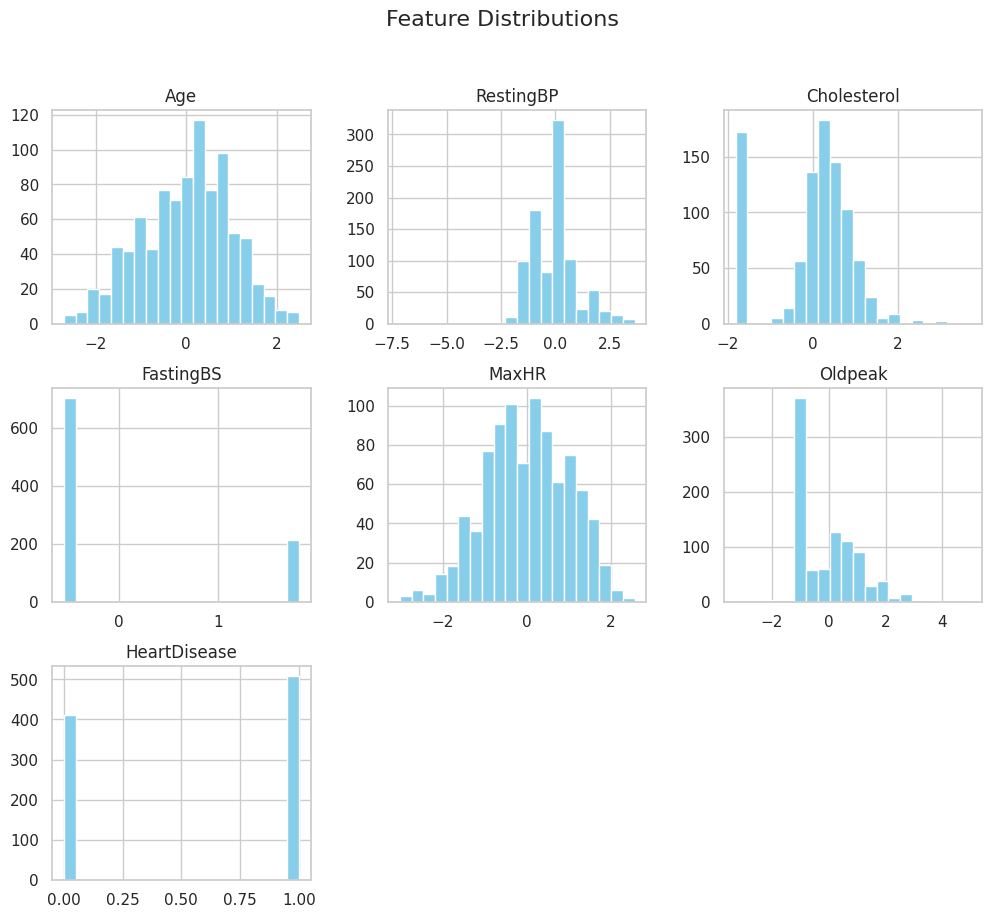

In [33]:
df.hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## Relationship between Features and Target

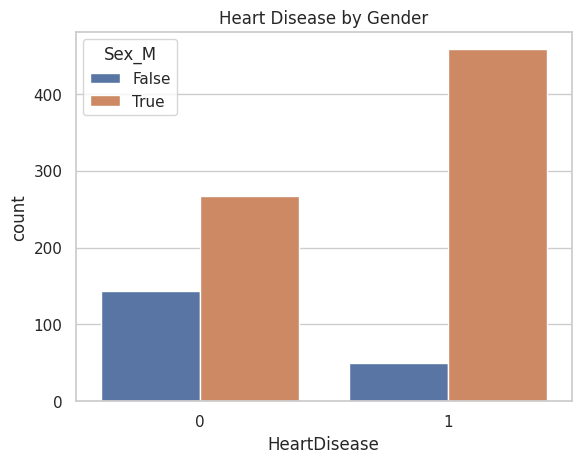

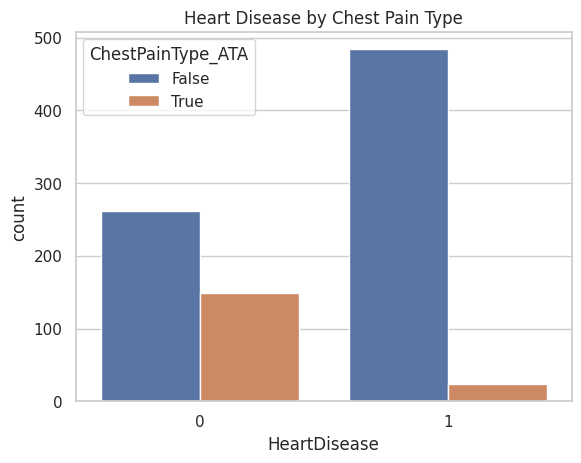

In [40]:
# Example: HeartDisease vs Sex
sns.countplot(x='HeartDisease', hue='Sex_M', data=df)
plt.title("Heart Disease by Gender")
plt.show()

# Example: ChestPainType vs HeartDisease
sns.countplot(x='HeartDisease', hue='ChestPainType_ATA', data=df)
plt.title("Heart Disease by Chest Pain Type")
plt.show()


# Feature Selection

Correlation with HeartDisease:
 HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.107589
RestingECG_ST        0.102527
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


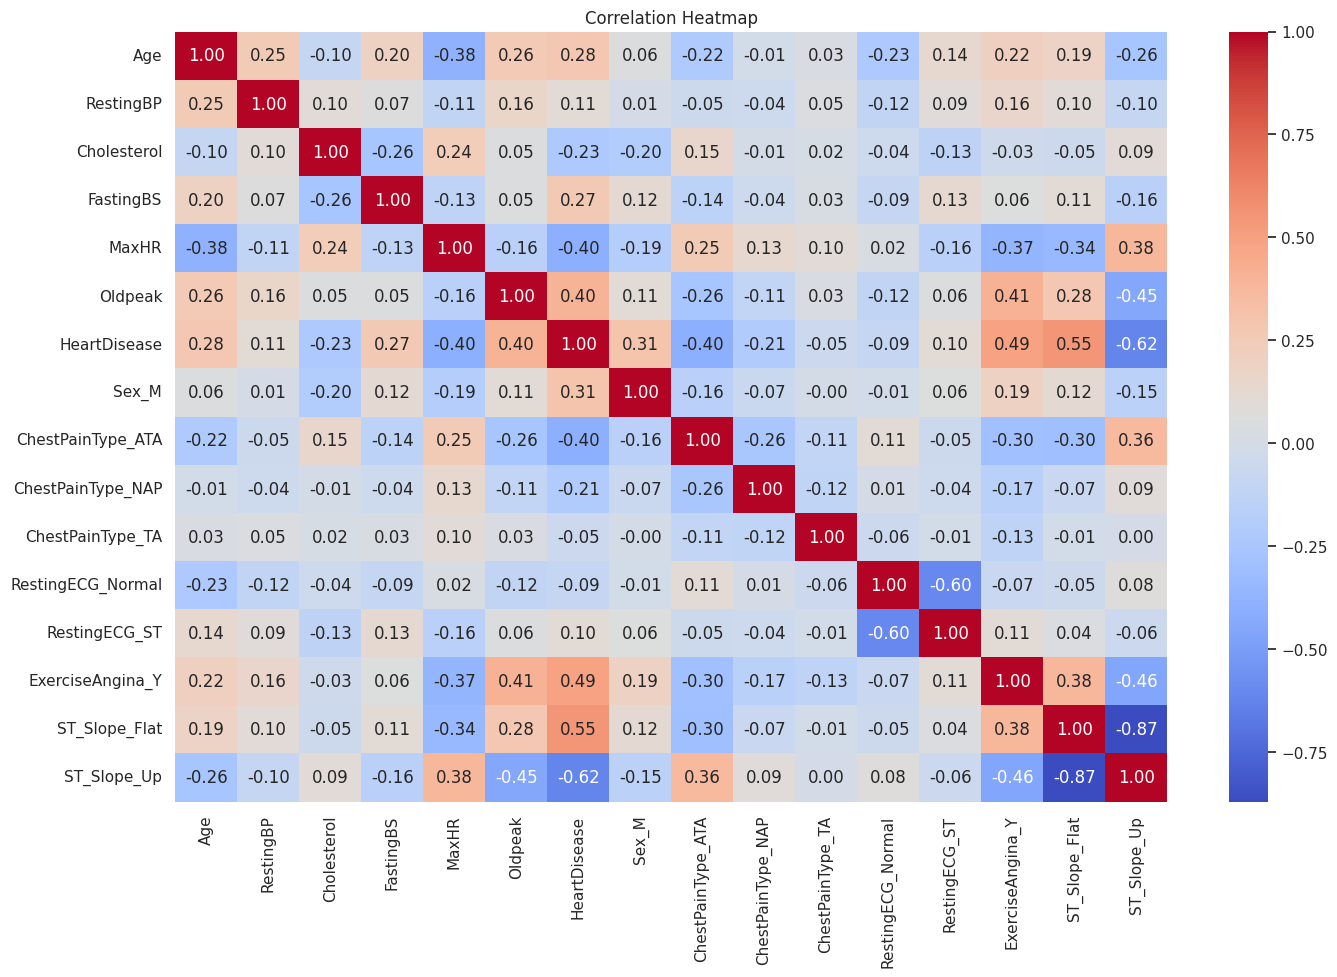

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
corr = df.corr()

# Focus on correlation with target only
target_corr = corr['HeartDisease'].sort_values(ascending=False)
print("Correlation with HeartDisease:\n", target_corr)

# Full heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#  Feature Importance (Using Tree Model)

Feature Importance:
 ST_Slope_Up          0.141796
Oldpeak              0.116279
MaxHR                0.116166
ExerciseAngina_Y     0.107293
Cholesterol          0.104472
ST_Slope_Flat        0.099484
Age                  0.084412
RestingBP            0.068642
Sex_M                0.041754
ChestPainType_ATA    0.040618
FastingBS            0.024602
ChestPainType_NAP    0.022934
RestingECG_Normal    0.014904
RestingECG_ST        0.009661
ChestPainType_TA     0.006983
dtype: float64


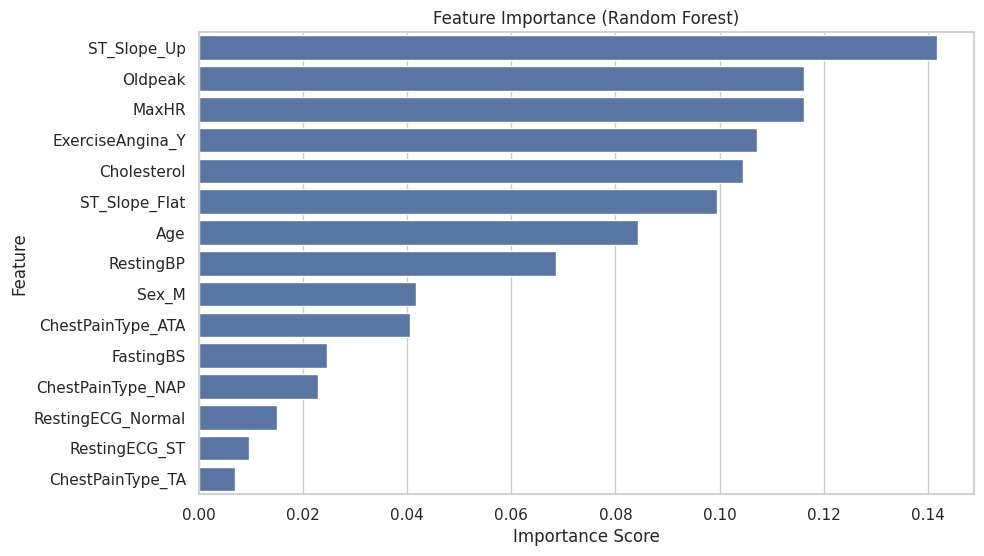

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Combine & sort
feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importance:\n", feature_scores)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Model Building & Evaluation

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [46]:
# Features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model 1: Logistic Regression

In [48]:
# Train
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
log_preds = log_model.predict(X_test)

# Evaluate
print("🔷 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))


🔷 Logistic Regression
Accuracy: 0.8858695652173914
Confusion Matrix:
 [[68 14]
 [ 7 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



#  Model 2: Decision Tree

In [49]:
# Train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
tree_preds = tree_model.predict(X_test)

# Evaluate
print("🟢 Decision Tree")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))


🟢 Decision Tree
Accuracy: 0.7934782608695652
Confusion Matrix:
 [[60 22]
 [16 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        82
           1       0.80      0.84      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



# Optional

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to test
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_tree = grid_search.best_estimator_

# Evaluate on test set
from sklearn.metrics import classification_report

y_pred = best_tree.predict(X_test)
print("🔍 Final Evaluation of Tuned Decision Tree:")
print(classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
🔍 Final Evaluation of Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        82
           1       0.78      0.91      0.84       102

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.82      0.81      0.81       184



## Deploy Model Using Streamlit

In [51]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = joblib.load("best_model.pkl")  # You must save your model first

# App UI
st.title("Heart Disease Prediction")

# Input fields
age = st.number_input("Age", 18, 100)
sex = st.selectbox("Sex", [0, 1])  # 0 = Female, 1 = Male
chol = st.number_input("Cholesterol", 100, 600)
bp = st.number_input("Resting Blood Pressure", 80, 200)
maxhr = st.number_input("Max Heart Rate", 60, 220)
oldpeak = st.number_input("Oldpeak", 0.0, 6.0)
fbs = st.selectbox("FastingBS (0/1)", [0, 1])
angina = st.selectbox("Exercise Angina", [0, 1])

# Create input array
input_data = np.array([[age, bp, chol, fbs, maxhr, oldpeak, sex, angina]])

# Predict button
if st.button("Predict"):
    result = model.predict(input_data)
    if result[0] == 1:
        st.error("⚠️ You may have heart disease.")
    else:
        st.success("✅ No heart disease detected.")


ModuleNotFoundError: No module named 'streamlit'